# Graded Lab Assignment: Logistic Regression

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function
    - cost_function
    - compute_gradient
    - correct stop condition
    - preventing overfitting
    - systematically choosing learning rate 
    - 
    

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


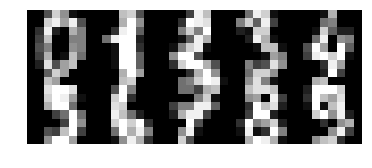

In [53]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Make sure to comment your code!

In [54]:
#Make a prediction function h
def prediction_function(x,theta):
    z = dot(theta.T, x) # dot(theta[i].T, x[i] ** i)?????
    x_predict = 1 / (1 + e ** (-z))
    return x_predict

In [55]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    cost = 1 / size(x_predict) * sum(-y * log(x_predict) - (1-y) * log(1 - x_predict))
    return cost

In [56]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    dtheta = np.dot(sum(transpose(x_predict) - reshape(y, (10,1))), x)
    grad = dtheta / np.size(x)
    return np.transpose(grad)

0.00030000000000000003


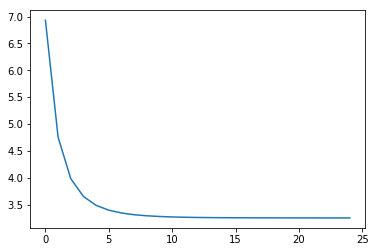

0.0009000000000000001


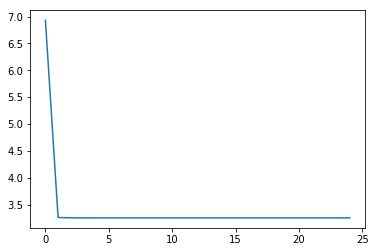

0.0027


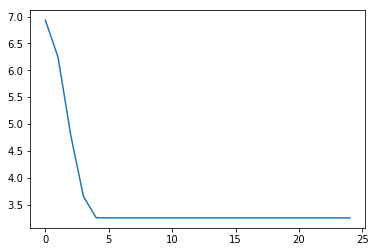

0.0081


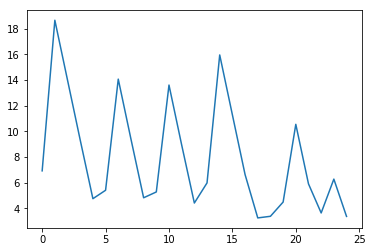

In [166]:
#Choose a suitable learning rate
alpha = 0.0001
for k in range(1,5):
    alpha = alpha * 3 # Change alpha by times 3 every iteration, to see with which alpha J(theta) decreases the fastest
    print(alpha)
    
    iterations = 25
    theta = np.zeros((64,10))

    #It is important to check that you're not overfitting by testing your prediction on a testset
    x = np.reshape(digits.images[:1500],(1500,64))
    x_test = np.reshape(digits.images[1500:],(297,64))

    target = digits.target[:1500]
    target_test = digits.target[1500:]
    
    tmp = np.zeros(25)
    # According to this ↓, the best alpha to choose would be 0.001
    for i in range(iterations):
        for j in range(x.shape[0]):
            x_predict = prediction_function(reshape(x[j,:], (64,1)),theta)
            y = np.zeros(10)
            y[target[j]] = 1
            change = alpha * transpose(compute_gradient(x_predict, y, reshape(x[j,:], (64,1)))) # calculate the change
        tmp[i] = J_theta = cost_function(x_predict,y) # Fill array tmp with the value of J_theta per iteration
        theta = theta - change # Change theta by [change] amount
    plt.plot(range(iterations),tmp)
    plt.show()

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.00301633 -0.00301633 -0.00301633 -0.00301633 -0.00301633 -0.00301633
  -0.00301633 -0.00301633 -0.00301633 -0.00301633]
 [-0.00965225 -0.00965225 -0.00965225 -0.00965225 -0.00965225 -0.00965225
  -0.00965225 -0.00965225 -0.00965225 -0.00965225]
 [-0.00784245 -0.00784245 -0.00784245 -0.00784245 -0.00784245 -0.00784245
  -0.00784245 -0.00784245 -0.00784245 -0.00784245]
 [-0.00060327 -0.00060327 -0.00060327 -0.00060327 -0.00060327 -0.00060327
  -0.00060327 -0.00060327 -0.00060327 -0.00060327]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.   

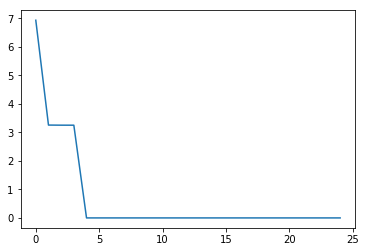

[[ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]
 [ 0.27499053]]
[[ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]
 [ 0.25125859]]
[[ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]
 [ 0.24551496]]
[[ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]
 [ 0.19635572]]
[[ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]
 [ 0.16825419]]
[[ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]
 [ 0.26949263]]
[[ 0.1811215]
 [ 0.1811215]
 [ 0.1811215]
 [ 0.1811215]
 [ 0.1811215]
 [ 0.1811215]
 [ 0.18112

In [168]:
#Choose a suitable learning rate
alpha = 0.001
iterations = 25
theta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

tmp = np.zeros(25)
for i in range(iterations):
    for j in range(x.shape[0]):
        x_predict = prediction_function(reshape(x[j,:], (64,1)),theta)
        y = np.zeros(10)
        y[target[j]] = 1
        change = alpha * transpose(compute_gradient(x_predict, y, reshape(x[j,:], (64,1)))) # calculate the change
    tmp[i] = J_theta = cost_function(x_predict,y) # Fill array tmp with the value of J_theta per iteration
    # When i becomes larger or equal to 1 (because otherwise 0-1 = -1 (doesn't exist))
    # and the change in J(theta) becomes smaller than 10^-3, theta has been found
    if i >= 1 and tmp[i-1] - tmp[i] < 10 ** -3:
        print(theta)
        print(i)
        break
    theta = theta - change # Change theta by [change] amount
    # Do something with target and target_test    

plt.plot(range(iterations),tmp)
# J(theta) goes to 3.(...), but the graph goes to zero,
# because function breaks after the last 'if' statement has come true
plt.show()
for h in range(x_test.shape[0]):
    x_predict = prediction_function(reshape(x_test[h,:], (64,1)),theta)
    print(x_predict)

In [161]:
print(target)

[0 1 2 ..., 6 3 2]
